**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! The project is accepted. Good luck on the final sprint!

## Project Title: Model Fitness customer interaction strategy

### Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
In order to fight churn, Model Fitness has digitized a number of its customer profiles.


In [1]:
!python -m pip install --upgrade pip
!python -m pip install sidetable -U
!python -m pip install -U seaborn 

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'REQUESTED'
Consider using the `--user` option or check the permissions.



In [2]:
# Loading all the libraries

import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.cluster import hierarchy
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
import plotly.express as px
import plotly.graph_objects as go
import math 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from functools import reduce
from statsmodels.stats.proportion import proportions_ztest
import re
import string

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format
#pd.options.display.max_colwidth = 100  

In [3]:
import sys
import warnings
if not sys.warnoptions:
        warnings.simplefilter("ignore");

### Step 1. Download the data 

In [4]:
# Load the data files into a DataFrame

try: 
    gym = pd.read_csv('gym_churn_us.csv')         
    
except:
    gym = pd.read_csv('/datasets/gym_churn_us.csv')
   

 
display(gym.head(), len(gym))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0


4000

**gym data table:**

- 	'gender' - gender of the user

-	'Near_Location' — whether the user lives or works in the neighborhood where the gym is located

-	'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

-	Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)

-	'Phone' — whether the user provided their phone number

- 	'Contract_period' — duration of the contract (1 month, 3 months, 6 months, or 1 year)

-	'Group_visits' — whether the user takes part in group sessions

-   'Age' - the age of the user

-	'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

- 'Month_to_end_contract' — the months remaining until the contract expires

-	'Lifetime' — the time (in months) since the customer first came to the gym

-	'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime

-	'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month

- 	'Churn' — the fact of churn for the month in question

### Step 2. Exploratory data analysis (EDA)

#### Look at the dataset

In [5]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0


In [6]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

- No missing values

In [7]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000
mean,0.510,0.845,0.487,0.308,0.903,4.681,0.412,29.184,146.944,4.323,3.725,1.879,1.767,0.265
std,0.500,0.362,0.500,0.462,0.295,4.550,0.492,3.258,96.356,4.191,3.749,0.972,1.053,0.442
min,0.000,0.000,0.000,0.000,0.000,1.000,0.000,18.000,0.148,1.000,0.000,0.000,0.000,0.000
25%,0.000,1.000,0.000,0.000,1.000,1.000,0.000,27.000,68.869,1.000,1.000,1.181,0.963,0.000
50%,1.000,1.000,0.000,0.000,1.000,1.000,0.000,29.000,136.220,1.000,3.000,1.833,1.720,0.000
75%,1.000,1.000,1.000,1.000,1.000,6.000,1.000,31.000,210.950,6.000,5.000,2.536,2.510,1.000
max,1.000,1.000,1.000,1.000,1.000,12.000,1.000,41.000,552.591,12.000,31.000,6.024,6.147,1.000


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

#### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed

In [8]:
gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510,0.873,0.534,0.354,0.904,5.747,0.464,29.977,158.446,5.283,4.712,2.025,2.028
1,0.511,0.768,0.355,0.184,0.903,1.729,0.269,26.990,115.083,1.663,0.991,1.475,1.045


In [9]:
gym.query('Churn == 1').head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
7,0,1,0,0,1,1,0,30,217.787,1.000,0,1.214,1.049,1
11,1,1,1,0,1,1,0,27,266.784,1.000,2,2.349,1.584,1
13,1,1,0,0,1,1,1,27,152.749,1.000,1,0.000,0.000,1
21,0,0,0,0,1,1,0,30,153.199,1.000,3,0.636,0.000,1
23,1,1,0,0,1,1,1,32,276.080,1.000,1,1.421,1.043,1


- Among those who left the majority is not from partner companies.
- They made shorter term contacts, they attended classes less frequently and they are younger then those who stayed.   

#### Plot bar histograms and feature distributions for those who left (churn) and those who stayed

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'Near_Location'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Promo_friends'}>],
       [<AxesSubplot:title={'center':'Phone'}>,
        <AxesSubplot:title={'center':'Contract_period'}>,
        <AxesSubplot:title={'center':'Group_visits'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Avg_additional_charges_total'}>,
        <AxesSubplot:title={'center':'Month_to_end_contract'}>,
        <AxesSubplot:title={'center':'Lifetime'}>,
        <AxesSubplot:title={'center':'Avg_class_frequency_total'}>],
       [<AxesSubplot:title={'center':'Avg_class_frequency_current_month'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

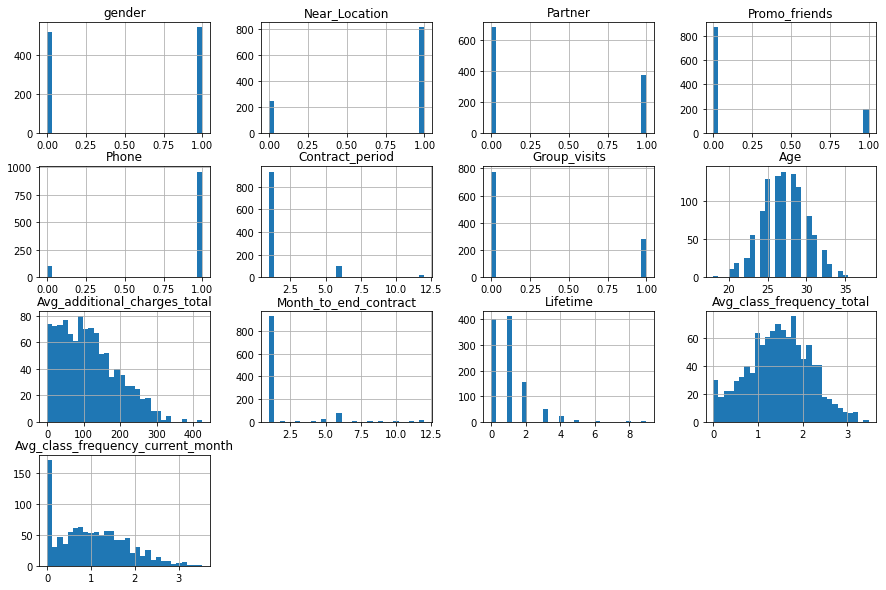

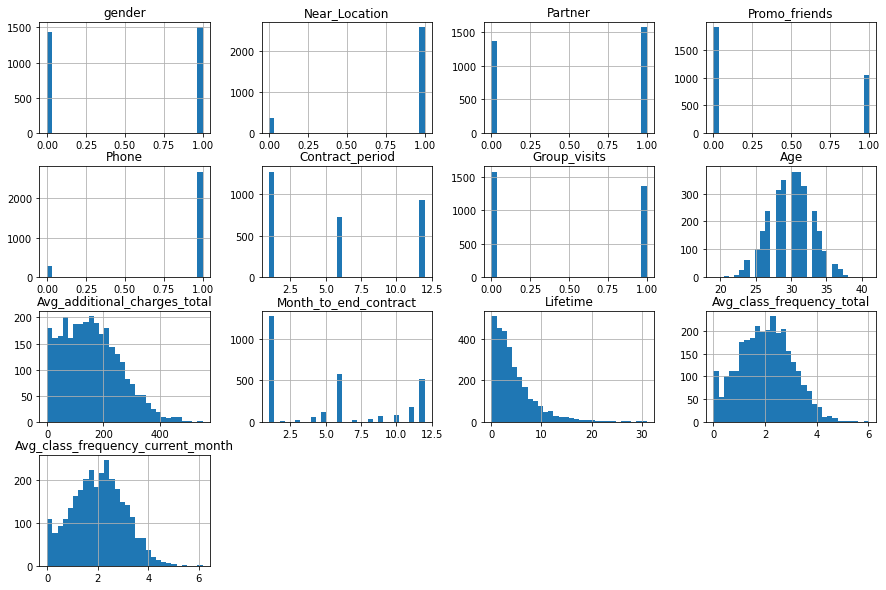

In [10]:
left = gym.query('Churn == 1')
left = left.drop('Churn', axis=1)
stay = gym.query('Churn == 0')
stay = stay.drop('Churn', axis=1)

#Feature distributions for those who left (churn)
#print('Feature distributions for those who left')
left.hist(bins=30, figsize=(15, 10))

#Feature distributions for those who stayed
#print('Feature distributions for those who stayed')
stay.hist(bins=30, figsize=(15, 10))


#for column in gym:
#    obj = gym[column]
#    print('Colunm Name : ', column)
#    print('Column Contents : ', obj.values)
#    print(sns.histplot (obj.values ,kde=True))
#for (columnName, columnData) in left.iteritems():
#     print(' {:.2} distribution'.format(columnName))
     #Feature distributions for those who left (churn)
#     sns.histplot (left.columnName ,kde=True)
     #Feature distributions for those who stayed
#     sns.histplot (stay.columnName ,kde=True)

In [11]:
print(left.Age.median(), stay.Age.median())

27.0 30.0


 gender distribution


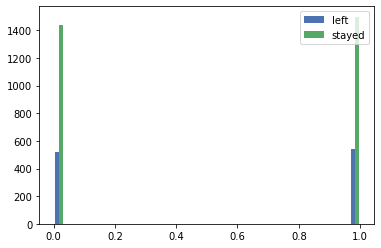

 Near_Location distribution


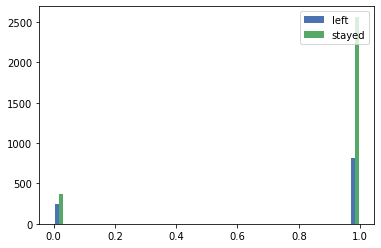

 Partner distribution


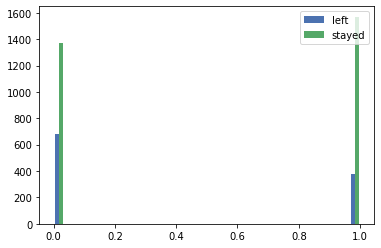

 Promo_friends distribution


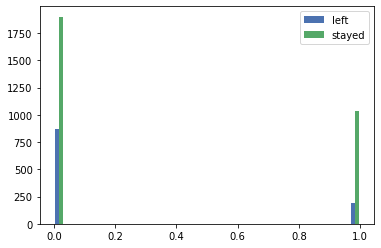

 Phone distribution


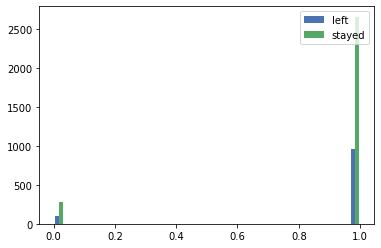

 Contract_period distribution


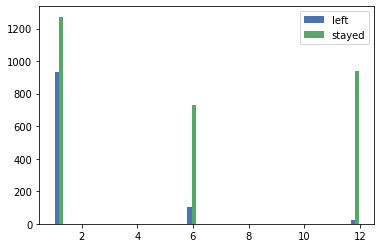

 Group_visits distribution


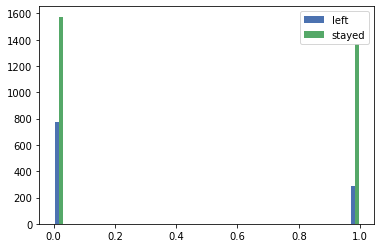

 Age distribution


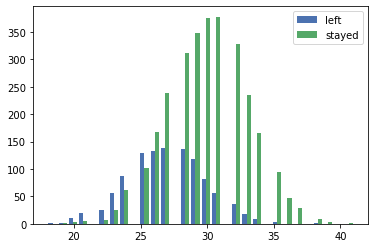

 Avg_additional_charges_total distribution


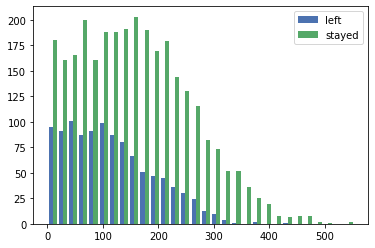

 Month_to_end_contract distribution


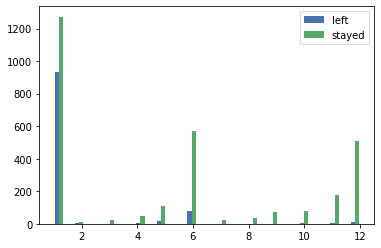

 Lifetime distribution


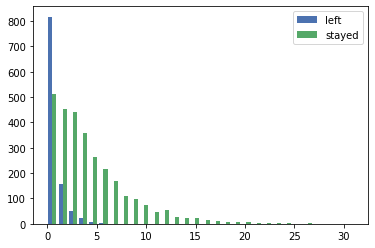

 Avg_class_frequency_total distribution


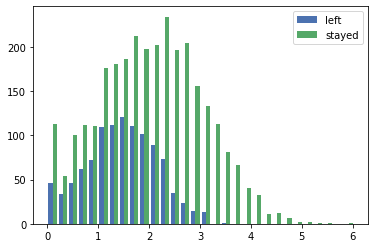

 Avg_class_frequency_current_month distribution


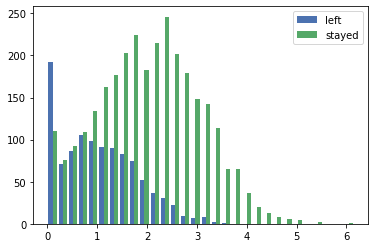

In [12]:
plt.style.use('seaborn-deep')
for column in left:
    print(' {:} distribution'.format(column))
    plt.hist([left[column], stay[column] ], bins=30 , label=['left', 'stayed'])
    plt.legend(loc='upper right')
    plt.show()

**Conclusions:**

The diffarance in feature distributions for those who left and those who stayed show that:

- Most of those who left have short contracts, while the distrebution of contract duration among those who stayed is more varied.

- The median Age of those who stayed is a bit higher (they are a bit older)

- The disrebution of Month_to_end_contract shows that most of those who left were nearing the end of their contract

- The Liftime(or length of being a member of said gym) ditrebution showes that long time members leave more rarly

- The total and average montly frequencies class visits distrebutions show that those who left attended less classes 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you compared the two groups and made some interesting observations!

</div>

#### Build a correlation matrix and display it.

In [13]:
corr_m = gym.corr()
corr_m

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000,0.007,-0.010,-0.005,-0.009,0.001,0.018,0.014,-0.009,-0.001,0.014,0.015,0.009,0.001
Near_Location,0.007,1.000,-0.005,0.211,-0.016,0.150,0.155,0.058,0.041,0.144,0.071,0.043,0.063,-0.128
Partner,-0.010,-0.005,1.000,0.452,0.010,0.306,0.023,0.047,0.023,0.295,0.061,0.025,0.046,-0.158
Promo_friends,-0.005,0.211,0.452,1.000,0.002,0.245,0.120,0.050,0.037,0.240,0.073,0.028,0.054,-0.162
Phone,-0.009,-0.016,0.010,0.002,1.000,-0.007,-0.010,-0.011,0.009,-0.011,-0.019,0.008,0.013,-0.001
Contract_period,0.001,0.150,0.306,0.245,-0.007,1.000,0.170,0.138,0.111,0.973,0.171,0.096,0.159,-0.390
Group_visits,0.018,0.155,0.023,0.120,-0.010,0.170,1.000,0.081,0.032,0.164,0.076,0.057,0.076,-0.175
Age,0.014,0.058,0.047,0.050,-0.011,0.138,0.081,1.000,0.080,0.135,0.165,0.120,0.183,-0.405
Avg_additional_charges_total,-0.009,0.041,0.023,0.037,0.009,0.111,0.032,0.080,1.000,0.114,0.079,0.044,0.080,-0.199
Month_to_end_contract,-0.001,0.144,0.295,0.240,-0.011,0.973,0.164,0.135,0.114,1.000,0.161,0.085,0.148,-0.381


<AxesSubplot:>

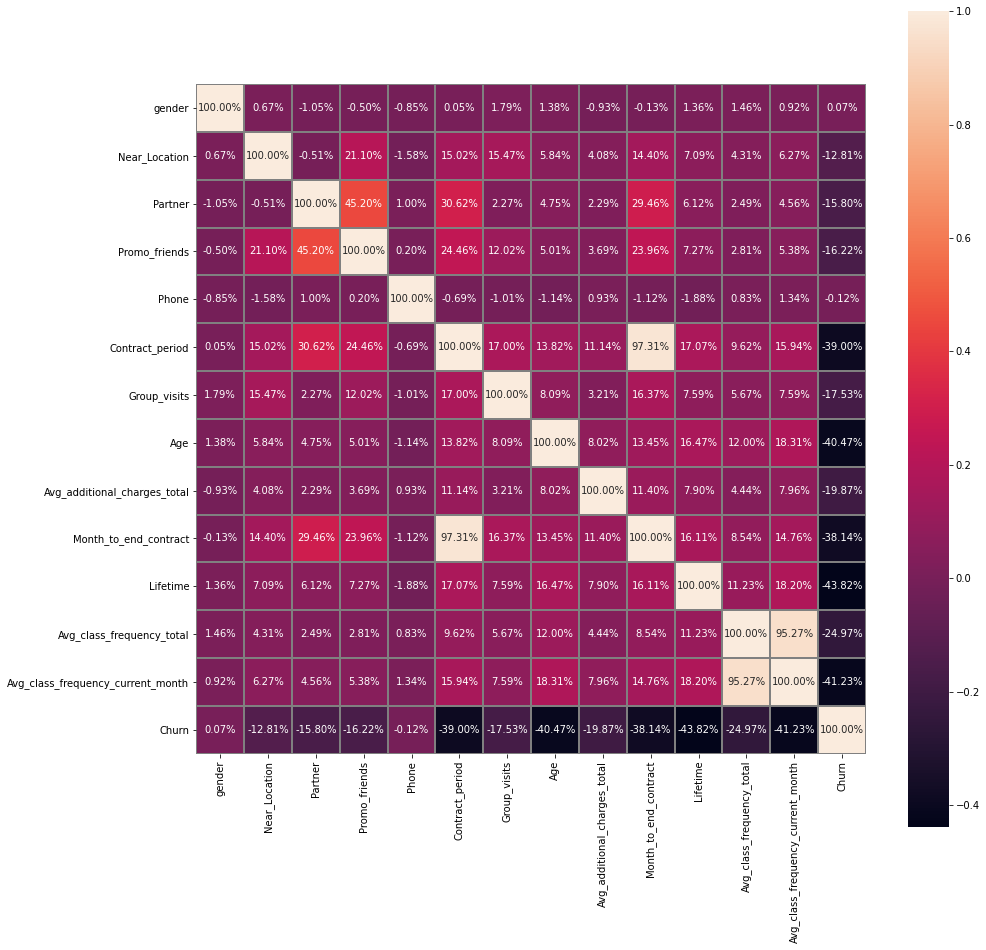

In [14]:
plt.figure(figsize = (15,15))
sns.heatmap(corr_m, annot=True, square = True, fmt='.2%', linewidths=1, linecolor='grey')

**Conclusions:**

Churn rate has nagative correlation with:

- Monthly frequency of class visits, users with less visits, are more likely to leave
- Liftime(or length of being a member of said gym), long time members leave more rarly
- Contract period, the shorter the contract, the higher probability of leave
- Age, the older users get the more they like stability and the less likely they are to leave
- Months remaining until the contract expires, closer to the expiration date of the contract means more likely to leave.

For further analysis (avoiding that collinearity thing):

- 'Avg_class_frequency_total' and 'Avg_class_frequency_current_month', have too high correlation, might mess up the results.
- 'Contract_period' and 'Month_to_end_contract', also have too high correlation.

General:
- 'Partner' and 'Promo_friends' have positive correlation, which makes sense as people from partner companies are likely to recomend to co-workers to use a gym they have discounts in.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Correlation analysis looks good!

</div>

#### Step 2. Conclusions:

- Users with less class visits, are more likely to leave.

- Long time users leave more rarly

- Most of those who left were nearing the end of their contract

- The median Age of those who stayed is a bit higher (they are a bit older), older users are less likely to leave

- Most of those who left had short term contracts

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very well!

</div>

### Step 3. Build a model to predict user churn

In [15]:
# divide the data into features (the X matrix) and a target variable (y)
#X = gym.drop('Churn', axis = 1)
X = gym.drop(['Churn', 'Avg_class_frequency_total', 'Month_to_end_contract'], axis=1)
y = gym['Churn']

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test

</div>

In [16]:
# define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [17]:
# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# define the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state=0)
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.82
	F1: 0.81
	ROC_AUC: 0.96


In [18]:
# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # write your code here
# train the random forest model
rf_model.fit(X_train, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test)# write your code here
rf_probabilities = rf_model.predict_proba(X_test)[:,1]# write your code here
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.75
	F1: 0.78
	ROC_AUC: 0.95


<div class="alert alert-success">
<b>Reviewer's comment</b>

The models were trained and evaluated correctly

</div>

**Which model gave better results?**

Metrics for logistic regression, are better (though not by much) .

The F-1 Score that is a measure of a test's accuracy, indicates that clealy.   

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right, random forest has slightly better precision, but logistic regression has a better recall, which is a more interesting metric for us in this case (roughly it measures how many of the customers who are going to leave our model will find), and as you noted the F1 score (which is the harmonic mean of precision and recall) is better for logistic regression as well.

</div>

### Step 4. Create user clusters

In [81]:
# obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
x_sc = sc.fit_transform(X)
linked = linkage(x_sc, method = 'ward') 

#### build a matrix of distances based on the standardized feature matrix and plot a dendrogram.

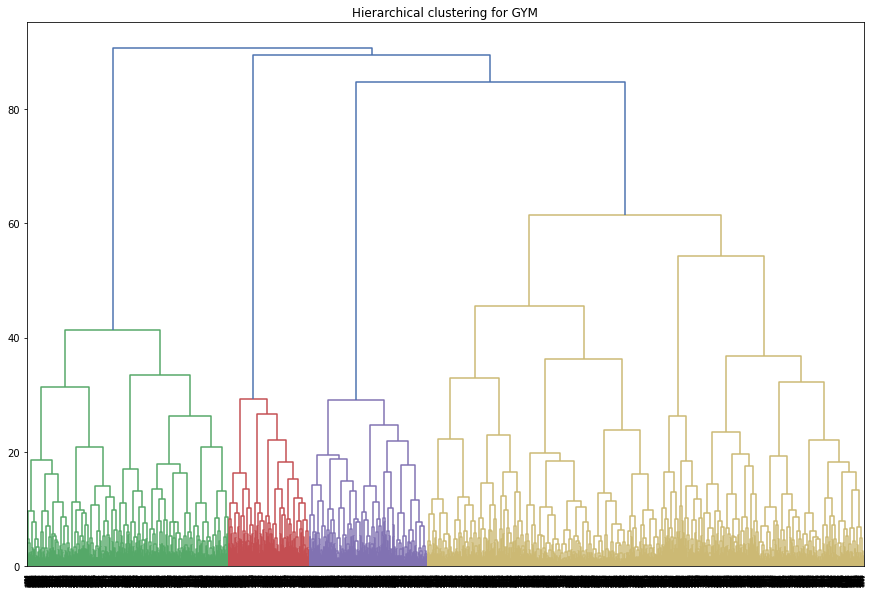

In [25]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

**Conclusions:**

The dendogram showed that optimal number of clusters is 4, but we were told to use 5. The chart gives 5 only if 'Avg_class_frequency_total' and  'Month_to_end_contract', but they need to be droped due to that collinearity thing.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

k-means is not really affected by multicollinearity, that's more of a problem for linear models, like linear regression

</div>

#### Train the clustering model with the K-means algorithm and predict customer clusters. 

In [28]:
# define the k_means model with 5 clusters (The number of clusters be n=5, so that it'll be easier to compare results with those of other students)
km = KMeans(n_clusters = 5)

# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(x_sc)

# store cluster labels in the field of our dataset
gym['cluster_km'] = labels
#print(gym.cluster_km.head())

#gym.groupby('cluster_km').mean()
print(gym.groupby('cluster_km').mean())

            gender  Near_Location  Partner  Promo_friends  Phone  \
cluster_km                                                         
0            0.494          0.996    0.959          0.789  1.000   
1            0.499          0.000    0.490          0.078  1.000   
2            0.560          0.999    0.144          0.070  1.000   
3            0.523          0.863    0.472          0.306  0.000   
4            0.483          1.000    0.277          0.119  1.000   

            Contract_period  Group_visits    Age  \
cluster_km                                         
0                     8.211         0.519 29.736   
1                     3.043         0.237 28.711   
2                     4.176         0.549 30.770   
3                     4.777         0.427 29.298   
4                     2.050         0.257 27.304   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km                                                                  
0   

<div class="alert alert-warning">
<b>Reviewer's comment</b>

It's a good idea to set the random state when using KMeans for reproducibility. Otherwise clusters can end up being slightly different every time we run the code due to random initialization.

</div>

#### Look at the mean feature values for clusters.

**Conclusions:**

- The first and fourth clusters are the ones with the highest churn rates 

- The zero and especialy secound clusters have very low churn rates.

- The zero and especialy secound have higher 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total', 'Age', 'Group_visits' and 'Lifetime', then other clusters.

- The first and fourth clusters have lower 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total', 'Age', 'Group_visits' and 'Lifetime', then other clusters. The same features that are high in zero and secound cluster.

- All other features are varied between clusters, for example zero cluster has high amount of users from partner companies, and secound cluster has the lowest amount of users from partner companies. While both clusters has low churn rates. 

- The defining feature of cluster 3 is that it concentrated all users that provided no phone number.

#### Plot distributions of features for the clusters.

In [44]:
#Categorical values: gender, Near_Location, Partner, Promo_friends, Phone, Group_visits.
#Numerial values: Contract_period, Age, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month

num_var = gym[['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'cluster_km']]
cat_var = gym[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn', 'cluster_km']]


Numerical Featurs: 
 Contract_period distribution


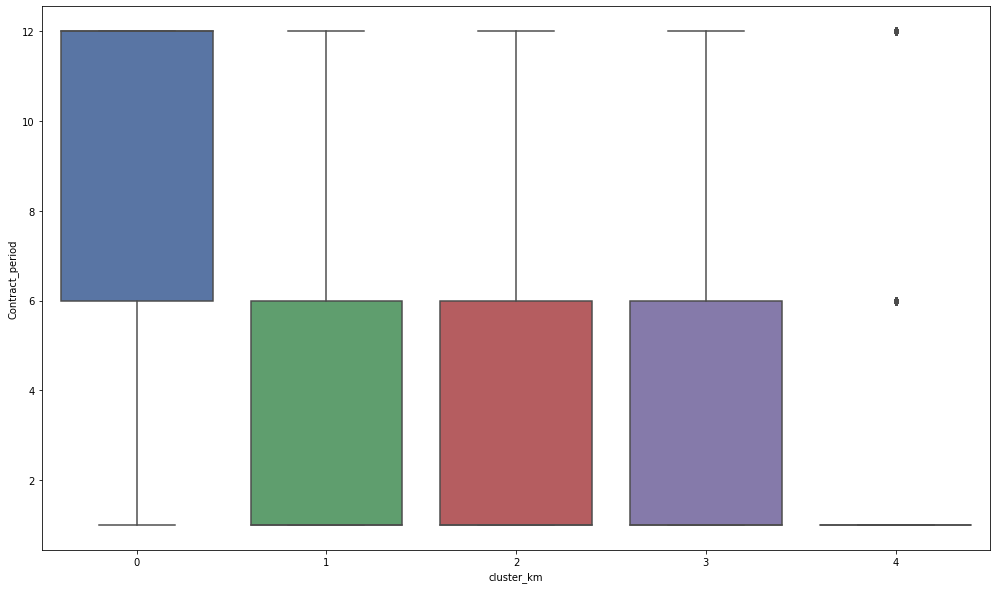

 Age distribution


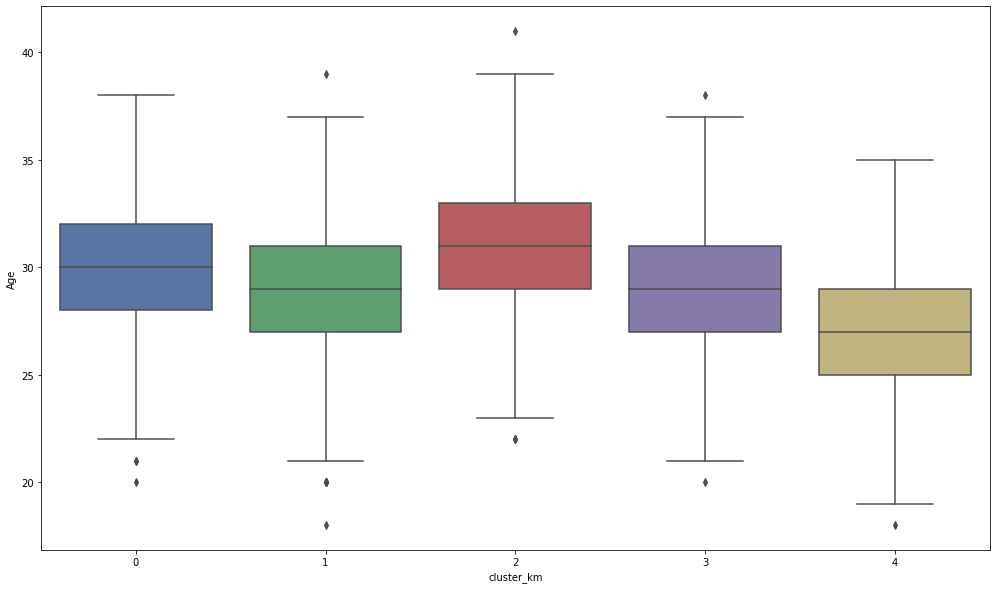

 Avg_additional_charges_total distribution


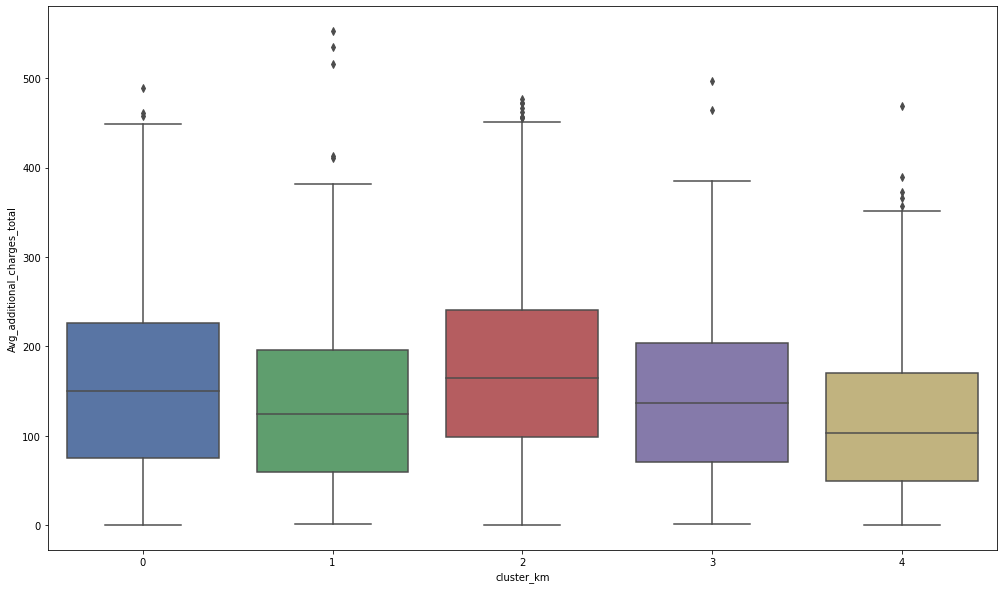

 Month_to_end_contract distribution


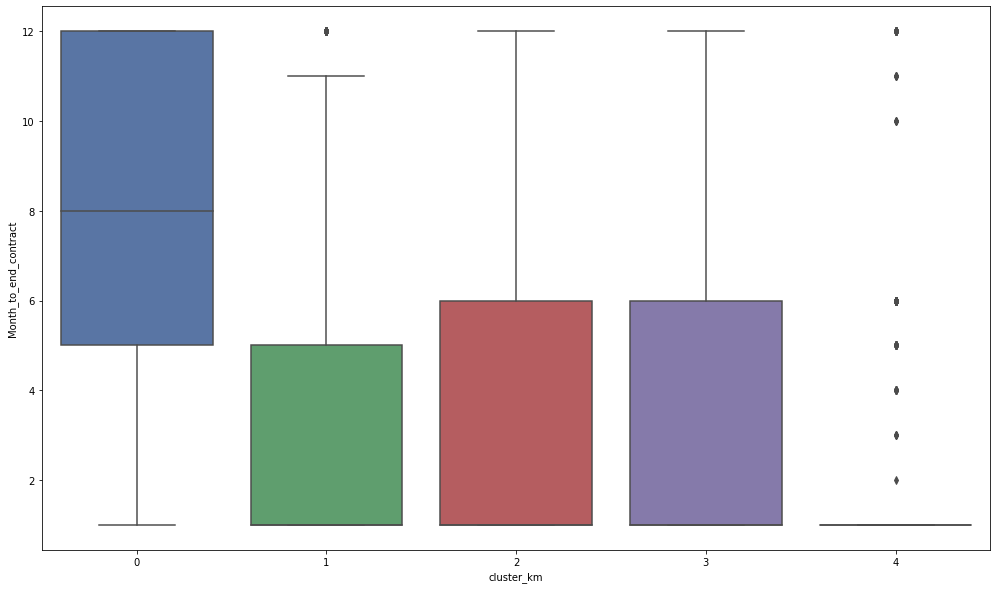

 Lifetime distribution


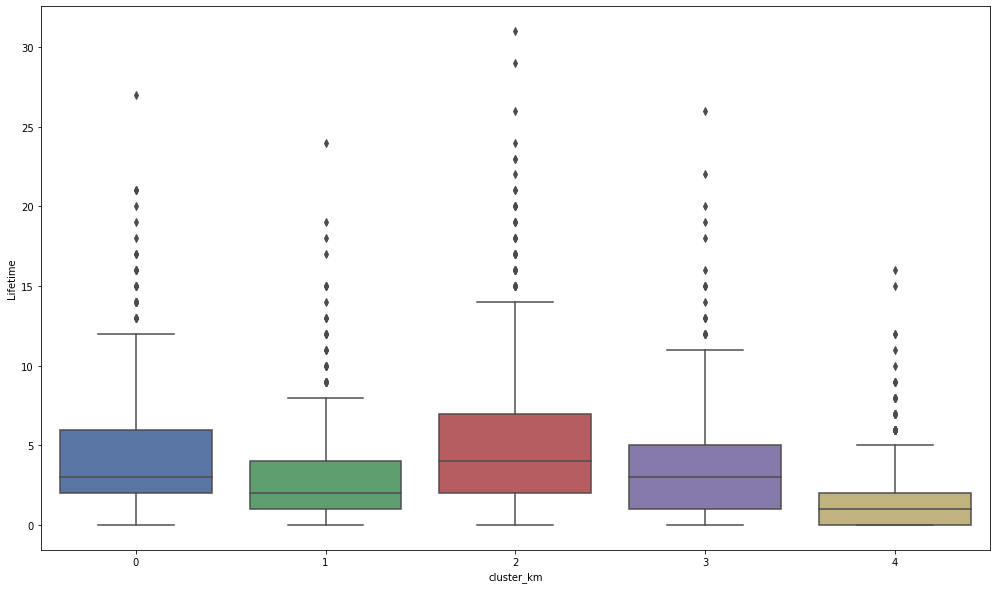

 Avg_class_frequency_total distribution


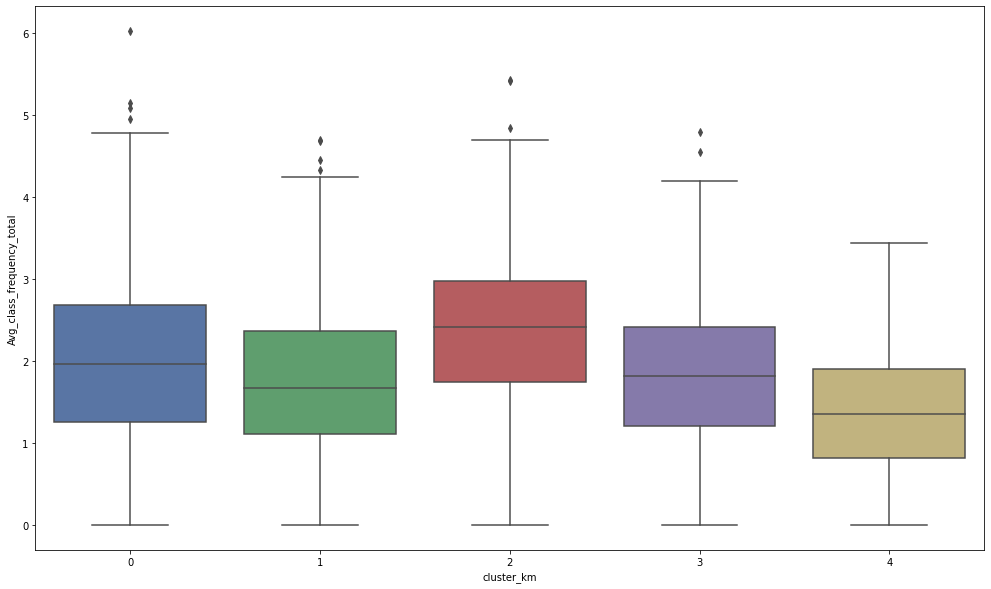

 Avg_class_frequency_current_month distribution


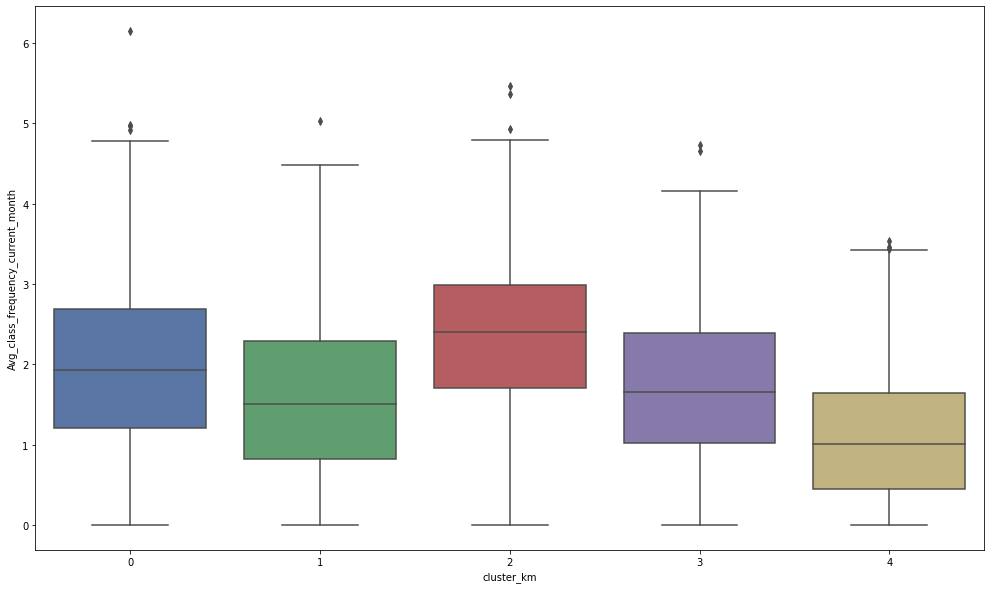

In [66]:
plt.style.use('seaborn-deep')
num_var_1 = num_var.drop('cluster_km', axis = 1)

print('Numerical Featurs: ')
for column in num_var_1:
    print(' {:} distribution'.format(column))
    fig,ax=plt.subplots(figsize=(17,10))
    ax=sns.boxplot(x='cluster_km', y= column , data=num_var, showfliers = True)
    plt.show()

In [70]:
cat_var.groupby('cluster_km').median()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Churn
cluster_km,,,,,,,
0,0,1,1,1,1,1,0
1,0,0,0,0,1,0,0
2,1,1,0,0,1,1,0
3,1,1,0,0,0,0,0
4,0,1,0,0,1,0,1


The fourth cluster is the most likely to churn.

Categorical Featurs: 
 gender distribution


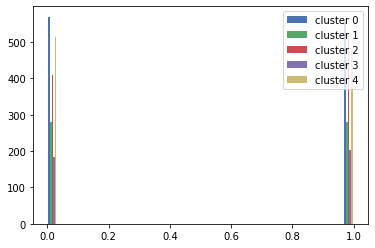

 Near_Location distribution


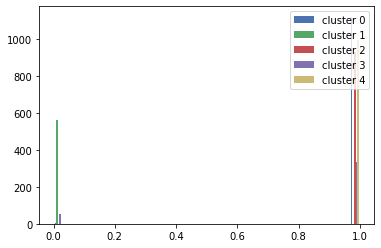

 Partner distribution


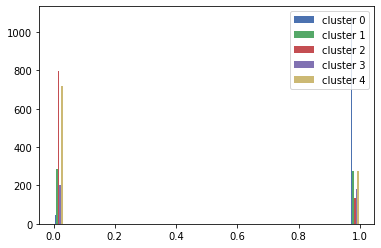

 Promo_friends distribution


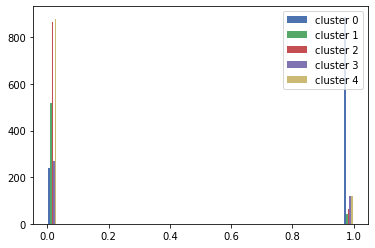

 Phone distribution


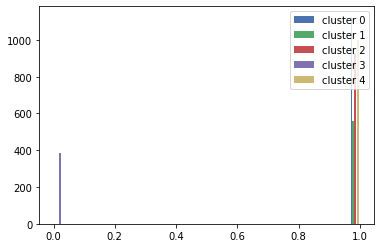

 Group_visits distribution


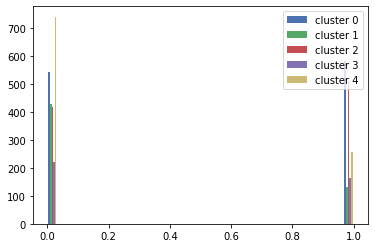

 Churn distribution


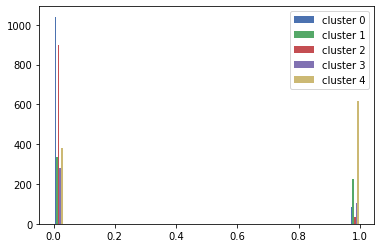

In [75]:
print('Categorical Featurs: ')

cl_0 = cat_var.query('cluster_km == 0')
cl_1 = cat_var.query('cluster_km == 1')
cl_2 = cat_var.query('cluster_km == 2')
cl_3 = cat_var.query('cluster_km == 3')
cl_4 = cat_var.query('cluster_km == 4')

for column in cat_var.drop('cluster_km', axis = 1):
    print(' {:} distribution'.format(column))
    #px.histogram(cat_var, x='cluster_km')
    plt.hist([cl_0[column], cl_1[column], cl_2[column], cl_3[column], cl_4[column]], bins=30 , label=['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'])
    plt.legend(loc='upper right')
    plt.show()

#### Calculate the churn rate for each cluster

In [76]:
cat_var.groupby('cluster_km')['Churn'].mean()

cluster_km
0   0.075
1   0.401
2   0.034
3   0.267
4   0.618
Name: Churn, dtype: float64

Churn distribution


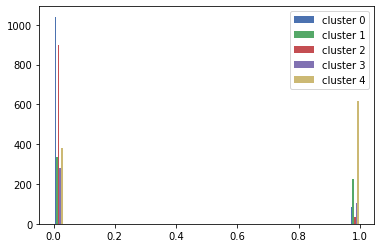

In [78]:
print('Churn distribution')
plt.hist([cl_0['Churn'], cl_1['Churn'], cl_2['Churn'], cl_3['Churn'], cl_4['Churn']], bins=30 , label=['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'])
plt.legend(loc='upper right')
plt.show()

**Conclusions:**

- The first and fourth clusters are the ones with the highest churn rates

- The zero and especialy secound clusters have very low churn rates

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent, you identified the clusters and studied them!

</div>

### Step 5. Come up with conclusions and basic recommendations on working with customers


**Overall conclusions**

- Among those who left the majority is not from partner companies. Those who left made shorter term contacts, they attended classes less frequently and they are younger than those who stayed.  

- The distribution of Month_to_end_contract shows that most of those who left were nearing the end of their contract

- The Lifetime (or length of being a member of said gym) distribution shows that long time members leave more rarely

- Metrics for logistic regression model, are better (though not by much) . The F-1 Score that is a measure of a test's accuracy, indicates that clearly.

- The dendrogram showed that optimal number of clusters is 4, but we were told to use 5. The chart gives 5 only if 'Avg_class_frequency_total' and 'Month_to_end_contract', but they need to be dropped due to that collinearity thing.

- The first and fourth clusters are the ones with the highest churn rates(churn rate of fourth cluster is especialy high).

- The zero and especially second clusters have very low churn rates.

- The zero and especially second have higher 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total', 'Age', 'Group_visits' and 'Lifetime', then other clusters.

- The first and fourth clusters have lower 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total', 'Age', 'Group_visits' and 'Lifetime', then other clusters. The same features that are high in zero and second cluster.

- All other features are varied between clusters, for example zero cluster has high number of users from partner companies, and second cluster has the lowest number of users from partner companies. While both clusters have low churn rates.

- The defining feature of cluster 3 is that it concentrated all users that provided no phone number.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Nice summary of your research!

</div>

**Recommendations**

- Most of those who left were nearing the end of their contract, That means that motivating users nearing the end of their contract might be a priority.

- Most of those who left shorter term contacts, and thier duration of being a member of said gym was shorter. So perheps making long term contracts more atractive and/or offering aditional things to clients who stay a certain time (massages, cafe cupons, sport inventory,etc...). Or a lottery thing say a free massage is raffled among long term clients or something (depands on budget, with the budget even a week in good spa resort tickets can be raffled, with lifetime being argument for number of lottery tickets or somthing). 

- Age and class_frequency are factors with high influence on churn rate, younger users and users with lower class attendance frequancy, tend to leave. So it might be a good idea to add more ativities and classes that interest those young users and appeal to them, thus giving them one more reason to stay (after all low atendance, might indicate lack of interest).  

<div class="alert alert-success">
<b>Reviewer's comment</b>

Recommendations are based on the data, well done!

</div>